In [64]:
import pandas as pd 

data = pd.read_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\data\\reservation.csvs')

In [65]:
data.columns

Index(['id', 'location_id', 'table_pref', 'device_id', 'party_size',
       'kids_size', 'high_chair_size', 'seat_together', 'channel_name',
       'section_id', 'notes', 'confirmation_no', 'reservation_time',
       'cancellation_time', 'estimate_seconds', 'actual_dinein_time',
       'actual_dineout_time', 'notify_party', 'reservation_status', 'user_id',
       'created_time', 'modified_time'],
      dtype='object')

In [66]:
specific_location_id = '7e2a8a81-1462-11eb-89a4-42010a010003'
df = data[data['location_id'] == specific_location_id]
df

,id,location_id,table_pref,device_id,party_size,kids_size,high_chair_size,seat_together,channel_name,section_id,...,reservation_time,cancellation_time,estimate_seconds,actual_dinein_time,actual_dineout_time,notify_party,reservation_status,user_id,created_time,modified_time
10,0001c3b4-32df-4f9b-b2c3-f2e5135cf5fb,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3,1,0,1.0,ONLINE,NaN,...,2022-06-02 23:10:51,NaN,0,NaN,NaN,1,I,3aefac33-d5e8-4b33-bbdf-08fbd2e1ef61,2022-06-02 23:10:51,2022-06-02 23:10:51
13,00023598-27ac-4203-a247-0e9d4f3cb1c0,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3,0,0,1.0,ONLINE,NaN,...,2021-10-30 22:43:51,NaN,0,2021-10-30 22:43:51,2021-10-30 23:45:30,1,C,f61c17b6-5839-4860-8032-77d20c63e945,2021-10-30 22:43:51,2021-10-30 23:45:30
14,0002a769-4a13-401d-905a-02541ba49405,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3,0,0,1.0,ONLINE,NaN,...,2021-11-13 01:46:54,NaN,0,2021-11-13 01:46:54,2021-11-13 16:38:28,1,C,6f0199f7-e0ac-4482-970a-7227e3991feb,2021-11-13 01:46:54,2021-11-13 16:38:28
15,0002ae19-0f50-4d71-adf9-b2c833f3844e,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,1,0,0,1.0,ONLINE,NaN,...,2022-05-23 01:30:58,NaN,0,2022-05-23 01:30:58,2022-05-24 17:26:04,0,C,NaN,2022-05-23 01:30:58,2022-05-24 17:26:04
16,0002df69-cfe5-41ef-a10b-c588e4411cb9,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,5,1,0,1.0,ONLINE,4e014b99-1468-11eb-89a4-42010a010007,...,2023-09-03 17:16:20,NaN,0,2023-09-03 17:37:35,NaN,1,L,NaN,2023-09-03 17:16:20,2023-09-03 17:42:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326578,fffbd588-420a-4612-b812-d8c17eaa2d23,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3,1,0,1.0,ONLINE,NaN,...,2021-03-26 16:20:30,NaN,0,2021-03-26 16:20:30,2021-03-26 21:48:34,1,C,d4c19dfc-f98b-48b5-a562-7b686481624f,2021-03-26 16:20:30,2021-03-26 21:48:34
326582,fffd0a86-f36d-4dc2-bc5f-fda99a214bb6,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,1,0,0,1.0,ONLINE,NaN,...,2021-09-24 21:33:37,NaN,0,2021-09-24 21:33:37,2021-09-24 21:34:22,1,C,02b4b292-2731-416c-ba5c-37f0b7bd83db,2021-09-24 21:33:37,2021-09-24 21:34:22
326589,fffea8ff-462b-4ddf-b13d-cefa971152e9,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,4,0,0,1.0,ONLINE,NaN,...,2022-07-04 16:56:06,NaN,0,2022-07-04 16:56:07,2022-07-04 18:52:38,1,C,a379a79d-5fc3-4b2b-bb4e-d0c47bb00075,2022-07-04 16:56:06,2022-07-04 18:52:38
326590,fffee5b3-76af-4ee0-b7c3-aefe73049132,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3,0,0,1.0,ONLINE,NaN,...,2022-03-13 17:24:26,NaN,0,NaN,NaN,1,I,cf975d9c-ff78-46f8-a1c1-d851460e0f02,2022-03-13 17:24:26,2022-03-13 17:24:26


In [67]:
import pandas as pd

# Assuming your data is already loaded into a DataFrame named df

# Convert reservation_time to datetime format with format inference
df['reservation_time'] = pd.to_datetime(df['reservation_time'], utc=True)

# Extract the hour from reservation_time
df['hour'] = df['reservation_time'].dt.hour

# Define bins (hourly intervals from 0 to 23)
bins = list(range(0, 25))  # Bins for each hour of the day (24 hours)
labels = [f'{i:02d}:00-{i+1:02d}:00' for i in range(0, 24)]  # Labels for each hour interval

# Categorize the hours into bins
df['time_bin'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False, include_lowest=True)

# Count the number of reservations in each bin
reservation_counts = df['time_bin'].value_counts().sort_index()

print(reservation_counts)


C:\Users\Admin\AppData\Local\Temp\ipykernel_14120\1598608996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_time'] = pd.to_datetime(df['reservation_time'], utc=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14120\1598608996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['reservation_time'].dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_14120\1598608996.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

time_bin
00:00-01:00    17992
01:00-02:00    10985
02:00-03:00     2250
03:00-04:00       49
04:00-05:00       11
05:00-06:00        5
06:00-07:00        7
07:00-08:00        1
08:00-09:00        2
09:00-10:00        2
10:00-11:00        2
11:00-12:00        2
12:00-13:00       11
13:00-14:00        4
14:00-15:00       12
15:00-16:00     2443
16:00-17:00     8397
17:00-18:00    11933
18:00-19:00    10319
19:00-20:00     5169
20:00-21:00     1126
21:00-22:00     2138
22:00-23:00     7521
23:00-24:00    15059
Name: count, dtype: int64


In [68]:
df.head(5)

,id,location_id,table_pref,device_id,party_size,kids_size,high_chair_size,seat_together,channel_name,section_id,...,estimate_seconds,actual_dinein_time,actual_dineout_time,notify_party,reservation_status,user_id,created_time,modified_time,hour,time_bin
10,0001c3b4-32df-4f9b-b2c3-f2e5135cf5fb,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3,1,0,1.0,ONLINE,NaN,...,0,NaN,NaN,1,I,3aefac33-d5e8-4b33-bbdf-08fbd2e1ef61,2022-06-02 23:10:51,2022-06-02 23:10:51,23,23:00-24:00
13,00023598-27ac-4203-a247-0e9d4f3cb1c0,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3,0,0,1.0,ONLINE,NaN,...,0,2021-10-30 22:43:51,2021-10-30 23:45:30,1,C,f61c17b6-5839-4860-8032-77d20c63e945,2021-10-30 22:43:51,2021-10-30 23:45:30,22,22:00-23:00
14,0002a769-4a13-401d-905a-02541ba49405,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3,0,0,1.0,ONLINE,NaN,...,0,2021-11-13 01:46:54,2021-11-13 16:38:28,1,C,6f0199f7-e0ac-4482-970a-7227e3991feb,2021-11-13 01:46:54,2021-11-13 16:38:28,1,01:00-02:00
15,0002ae19-0f50-4d71-adf9-b2c833f3844e,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,1,0,0,1.0,ONLINE,NaN,...,0,2022-05-23 01:30:58,2022-05-24 17:26:04,0,C,NaN,2022-05-23 01:30:58,2022-05-24 17:26:04,1,01:00-02:00
16,0002df69-cfe5-41ef-a10b-c588e4411cb9,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,5,1,0,1.0,ONLINE,4e014b99-1468-11eb-89a4-42010a010007,...,0,2023-09-03 17:37:35,NaN,1,L,NaN,2023-09-03 17:16:20,2023-09-03 17:42:52,17,17:00-18:00


In [69]:
import pandas as pd
import pytz

# Example DataFrame
df = pd.DataFrame(df)

# Define the US Eastern timezone
# us_eastern = pytz.timezone('US/Eastern')

# Convert reservation_time to datetime format and set timezone to US Eastern
df['reservation_time'] = pd.to_datetime(df['reservation_time'], utc=True)

# Extract the day of the week and store it in a new column 'weekday'
df['weekday'] = df['reservation_time'].dt.day_name()

print(df)



                                          id  \
10      0001c3b4-32df-4f9b-b2c3-f2e5135cf5fb   
13      00023598-27ac-4203-a247-0e9d4f3cb1c0   
14      0002a769-4a13-401d-905a-02541ba49405   
15      0002ae19-0f50-4d71-adf9-b2c833f3844e   
16      0002df69-cfe5-41ef-a10b-c588e4411cb9   
...                                      ...   
326578  fffbd588-420a-4612-b812-d8c17eaa2d23   
326582  fffd0a86-f36d-4dc2-bc5f-fda99a214bb6   
326589  fffea8ff-462b-4ddf-b13d-cefa971152e9   
326590  fffee5b3-76af-4ee0-b7c3-aefe73049132   
326591  fffeedd0-893c-4dbd-b6cd-05c030f0dbec   

                                 location_id  table_pref  device_id  \
10      7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN   
13      7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN   
14      7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN   
15      7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN   
16      7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN 

In [70]:
df.columns

Index(['id', 'location_id', 'table_pref', 'device_id', 'party_size',
       'kids_size', 'high_chair_size', 'seat_together', 'channel_name',
       'section_id', 'notes', 'confirmation_no', 'reservation_time',
       'cancellation_time', 'estimate_seconds', 'actual_dinein_time',
       'actual_dineout_time', 'notify_party', 'reservation_status', 'user_id',
       'created_time', 'modified_time', 'hour', 'time_bin', 'weekday'],
      dtype='object')

In [71]:
res_table = pd.read_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\data\\reservation_table.csv')

In [72]:
specific_location_id = '7e2a8a81-1462-11eb-89a4-42010a010003'
res_table = res_table[res_table['location_id'] == specific_location_id]

In [73]:
merge = pd.merge(df, res_table, left_on='id', right_on='reservation_id',how='right')

In [74]:
merge.columns

Index(['id_x', 'location_id_x', 'table_pref', 'device_id', 'party_size',
       'kids_size', 'high_chair_size', 'seat_together', 'channel_name',
       'section_id_x', 'notes', 'confirmation_no', 'reservation_time',
       'cancellation_time', 'estimate_seconds', 'actual_dinein_time',
       'actual_dineout_time', 'notify_party', 'reservation_status', 'user_id',
       'created_time_x', 'modified_time_x', 'hour', 'time_bin', 'weekday',
       'id_y', 'reservation_id', 'location_id_y', 'section_id_y', 'table_id',
       'staff_id', 'guest_seated', 'assignment_time', 'created_time_y',
       'modified_time_y'],
      dtype='object')

In [75]:
import pandas as pd

merge['assignment_time'] = pd.to_datetime(merge['assignment_time'], errors='coerce', utc=True)
merge['reservation_time'] = pd.to_datetime(merge['reservation_time'], errors='coerce', utc=True)

merge['ETA'] = (merge['assignment_time'] - merge['reservation_time']).dt.total_seconds() / 60

merge['assignment_time'] = merge['assignment_time'].dt.tz_localize(None)
merge['reservation_time'] = merge['reservation_time'].dt.tz_localize(None)


In [76]:
table = pd.read_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\data\\table.csv')

In [77]:
merge_2 = pd.merge(res_table,table,left_on='table_id',right_on='id',how='left')

In [78]:
merge_4 = pd.merge(merge,table,left_on='table_id',right_on='id',how='left')

In [79]:
merge_4.columns

Index(['id_x', 'location_id_x', 'table_pref', 'device_id', 'party_size',
       'kids_size', 'high_chair_size', 'seat_together', 'channel_name',
       'section_id_x', 'notes', 'confirmation_no', 'reservation_time',
       'cancellation_time', 'estimate_seconds', 'actual_dinein_time',
       'actual_dineout_time', 'notify_party', 'reservation_status', 'user_id',
       'created_time_x', 'modified_time_x', 'hour', 'time_bin', 'weekday',
       'id_y', 'reservation_id', 'location_id_y', 'section_id_y', 'table_id',
       'staff_id', 'guest_seated', 'assignment_time', 'created_time_y',
       'modified_time_y', 'ETA', 'id', 'location_id', 'section_id',
       'table_name', 'attributes', 'min_capacity', 'max_capacity',
       'assigned_staff_id', 'assigned_time', 'status', 'sort_order',
       'is_enabled', 'created_time', 'modified_time'],
      dtype='object')

In [80]:
merge_4=merge_4.drop(columns=['seat_together','channel_name','section_id_x','notes','confirmation_no','notify_party','user_id','created_time_x','modified_time_x','id_y','reservation_id','location_id_y','section_id_y','staff_id','guest_seated','created_time_y','modified_time_y','id','location_id','section_id','attributes','assigned_staff_id','assigned_time','status','sort_order','created_time','modified_time'])

In [81]:
merge_4 = merge_4.rename(columns={
    'id_x':'reservation_id',
    'location_id_x':'locaion_id',
})

In [82]:
merge_4.columns

Index(['reservation_id', 'locaion_id', 'table_pref', 'device_id', 'party_size',
       'kids_size', 'high_chair_size', 'reservation_time', 'cancellation_time',
       'estimate_seconds', 'actual_dinein_time', 'actual_dineout_time',
       'reservation_status', 'hour', 'time_bin', 'weekday', 'table_id',
       'assignment_time', 'ETA', 'table_name', 'min_capacity', 'max_capacity',
       'is_enabled'],
      dtype='object')

In [83]:
merge_4.to_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\results\\final_merge.csv')

In [84]:
merge_4

,reservation_id,locaion_id,table_pref,device_id,party_size,kids_size,high_chair_size,reservation_time,cancellation_time,estimate_seconds,...,hour,time_bin,weekday,table_id,assignment_time,ETA,table_name,min_capacity,max_capacity,is_enabled
0,62322b8e-b75b-4ad3-9830-ad1c0f9b18ab,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,1.0,0.0,0.0,2022-02-06 02:23:33,NaN,0.0,...,2.0,02:00-03:00,Sunday,65ed8940-146d-11eb-89a4-42010a010007,2022-02-06 02:23:33,0.000000,C21,1,2,1
1,2ae2b5d3-8967-40c0-b9fd-7689be4c951a,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,1.0,0.0,0.0,2021-05-13 22:10:41,NaN,0.0,...,22.0,22:00-23:00,Thursday,2a62081c-146d-11eb-89a4-42010a010007,2021-05-13 22:10:41,0.000000,C8,1,4,1
2,387a711e-6e90-4b3e-a6a3-cf60b220a393,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,4.0,1.0,0.0,2023-01-15 22:32:39,NaN,0.0,...,22.0,22:00-23:00,Sunday,0d0e030f-146d-11eb-89a4-42010a010007,2023-01-15 22:32:39,0.000000,C4,1,3,1
3,096f4fda-35ea-4db9-b0f4-6209e1ee256b,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,2.0,0.0,0.0,2023-09-24 01:29:04,NaN,0.0,...,1.0,01:00-02:00,Sunday,704e1fcb-c50b-4f85-bc03-293b3b5bc56d,2023-09-24 01:32:05,3.016667,D2,1,4,1
4,6891fa3a-589c-4156-8f35-5bd0ac24a22c,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,1.0,0.0,0.0,2021-11-03 16:17:32,NaN,0.0,...,16.0,16:00-17:00,Wednesday,96cbd200-7ce8-4e65-9493-e3e4f31a2eeb,2021-11-03 16:17:32,0.000000,A3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80025,eb1e3f73-d2cf-44c3-a7bb-6de946d90b70,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,1.0,0.0,0.0,2022-04-10 16:50:23,NaN,0.0,...,16.0,16:00-17:00,Sunday,1e57ca5f-146d-11eb-89a4-42010a010007,2022-04-10 16:50:23,0.000000,C7,1,4,1
80026,c4d9bc9a-992f-49c7-9f85-d0a8c466aa40,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,1.0,0.0,0.0,2022-03-15 23:04:21,NaN,0.0,...,23.0,23:00-24:00,Tuesday,68792114-146d-11eb-89a4-42010a010007,2022-03-15 23:04:21,0.000000,C22,1,2,1
80027,f7a74726-853f-4de0-a2dc-5888537e8710,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,1.0,0.0,0.0,2021-12-18 00:22:15,NaN,0.0,...,0.0,00:00-01:00,Saturday,77fdb917-146d-11eb-89a4-42010a010007,2021-12-18 00:18:38,-3.616667,C26,1,4,1
80028,968cfd2b-1ee9-48d8-8173-b4f70fcc93d4,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3.0,0.0,0.0,2021-09-29 01:00:15,NaN,0.0,...,1.0,01:00-02:00,Wednesday,329e07a2-146d-11eb-89a4-42010a010007,2021-09-29 01:00:15,0.000000,C10,1,4,1


In [85]:
import pandas as pd

# Load the DataFrame from the CSV file
df = pd.read_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\results\\final_merge.csv')

# Function to convert datetime strings to UTC datetime objects
def convert_to_utc(dt):
    try:
        return pd.to_datetime(dt, utc=True)
    except Exception as e:
        print(f"Error while converting datetime to UTC: {e}")
        return pd.NaT  # Return NaT for any errors during conversion
  
# Apply the conversion function to the relevant columns
df['reservation_time'] = df['reservation_time'].apply(convert_to_utc)
df['assignment_time'] = df['assignment_time'].apply(convert_to_utc)

queue_sizes = []

for i in range(len(df)):
    current_reservation_time = df.loc[i, 'reservation_time']
    current_dinein_time = df.loc[i, 'assignment_time']
    
    # Filter relevant rows based on reservation_time and assignment_time
    relevant_rows = df[(df['reservation_time'] <= current_reservation_time) & 
                       (df['assignment_time'] > current_reservation_time)]  # Changed comparison to strict greater than
    
    queue_size = len(relevant_rows)  # No need to subtract 1, as we are excluding the current reservation itself
    queue_sizes.append(queue_size)

# Add the queue_sizes list as a new column in the DataFrame
df['queue_size'] = queue_sizes

# Save the updated DataFrame back to CSV
df.to_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\results\\final_merge_1.csv', index=False)

print("Queue sizes have been calculated and added to the CSV file.")


C:\Users\Admin\AppData\Local\Temp\ipykernel_14120\1388106494.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\results\\final_merge.csv')


Queue sizes have been calculated and added to the CSV file.


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Convert to DataFrame
df = pd.DataFrame(df)

# Convert to datetimea
df['reservation_time'] = pd.to_datetime(df['reservation_time'], format='%m/%d/%Y %H:%M')

# Extract day, month, hour, and weekday
df['day'] = df['reservation_time'].dt.day
df['month'] = df['reservation_time'].dt.month
#df['hour'] = df['reservation_time'].dt.hour
#df['weekday'] = df['reservation_time'].dt.dayofweek  # Monday=0, Sunday=6

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

# Display the dataframe
print(df.head())


   Unnamed: 0                        reservation_id  \
0           0  62322b8e-b75b-4ad3-9830-ad1c0f9b18ab   
1           1  2ae2b5d3-8967-40c0-b9fd-7689be4c951a   
2           2  387a711e-6e90-4b3e-a6a3-cf60b220a393   
3           3  096f4fda-35ea-4db9-b0f4-6209e1ee256b   
4           4  6891fa3a-589c-4156-8f35-5bd0ac24a22c   

                             locaion_id  table_pref  device_id  party_size  \
0  7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN         1.0   
1  7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN         1.0   
2  7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN         4.0   
3  7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN         2.0   
4  7e2a8a81-1462-11eb-89a4-42010a010003         NaN        NaN         1.0   

   kids_size  high_chair_size          reservation_time cancellation_time  \
0        0.0              0.0 2022-02-06 02:23:33+00:00               NaN   
1        0.0              0.0 2021-05-13 22:10

In [87]:
df.columns

Index(['Unnamed: 0', 'reservation_id', 'locaion_id', 'table_pref', 'device_id',
       'party_size', 'kids_size', 'high_chair_size', 'reservation_time',
       'cancellation_time', 'estimate_seconds', 'actual_dinein_time',
       'actual_dineout_time', 'reservation_status', 'hour', 'time_bin',
       'weekday', 'table_id', 'assignment_time', 'ETA', 'table_name',
       'min_capacity', 'max_capacity', 'is_enabled', 'queue_size', 'day',
       'month', 'season'],
      dtype='object')

In [88]:
statuses_to_include = ["I", "A", "S", "C"]

# Filter the DataFrame
filtered_df = df[df['reservation_status'].isin(statuses_to_include)]


In [89]:
blanks = ['(Blanks)']
filtered_df = filtered_df[~filtered_df['ETA'].isin(blanks)]

In [90]:
import pandas as pd

# Read the CSV file into a DataFrame
#df = pd.read_csv("/Users/apple/Downloads/ML/ETA_checkin/results/final_merge_1.csv")

# Convert 'reservation_time' column to datetime if it's not already
filtered_df['reservation_time'] = pd.to_datetime(filtered_df['reservation_time'])

# Sort by 'reservation_time' column (oldest to newest)
df_sorted = filtered_df.sort_values(by='reservation_time')

df_sorted.drop(columns='Unnamed: 0',inplace=True)

df_sorted.to_csv("C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\results\\final_merge_1.csv")

In [91]:
df_sorted['high_chair_size'] = df_sorted['high_chair_size'].apply(lambda x: 1 if x > 0 else 0)

In [92]:
df_sorted.to_csv("C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\results\\final_merge_1.csv")

In [93]:
df_sorted

,reservation_id,locaion_id,table_pref,device_id,party_size,kids_size,high_chair_size,reservation_time,cancellation_time,estimate_seconds,...,assignment_time,ETA,table_name,min_capacity,max_capacity,is_enabled,queue_size,day,month,season
46228,ee49f2ce-6c1b-4e32-9fd4-f097e16c230a,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,4.0,2.0,0,2020-10-24 21:41:53+00:00,NaN,0.0,...,2020-10-24 21:56:40+00:00,14.783333,C11,1,4,1,1,24.0,10.0,Autumn
48515,80f3c6a2-ccf4-4252-a0d9-626655910a3a,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,4.0,2.0,0,2020-10-24 21:42:32+00:00,NaN,0.0,...,2020-10-24 21:56:54+00:00,14.366667,C12,1,4,1,2,24.0,10.0,Autumn
79372,665b990d-fb8c-488b-96c9-cf8162a4048a,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,4.0,0.0,0,2020-10-24 21:53:45+00:00,NaN,0.0,...,2020-10-24 21:56:13+00:00,2.466667,C17,1,6,1,3,24.0,10.0,Autumn
73802,1b6efb5b-f997-482b-a5df-e4e3ee1ab684,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3.0,0.0,0,2020-10-24 21:54:09+00:00,NaN,0.0,...,2020-10-24 21:55:32+00:00,1.383333,C16,1,2,1,4,24.0,10.0,Autumn
5089,0064931a-09c9-48f1-957a-ccd9ba371776,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,2.0,0.0,0,2020-10-24 21:58:08+00:00,NaN,0.0,...,2020-10-24 21:59:01+00:00,0.883333,S2,1,4,1,1,24.0,10.0,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25698,d149f35d-3344-4caa-ab34-b3f7a4cdefdf,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,7.0,3.0,0,2024-06-30 01:44:23+00:00,NaN,0.0,...,2024-06-30 01:48:25+00:00,4.033333,C4,1,3,1,3,30.0,6.0,Summer
5194,e21ca297-ab8f-441b-976d-c9e8194840f7,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,5.0,2.0,0,2024-06-30 01:47:41+00:00,NaN,0.0,...,2024-06-30 01:49:18+00:00,1.616667,C15,1,2,1,4,30.0,6.0,Summer
64725,90c406c8-d37f-432d-ac0a-877413a65f66,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,2.0,0.0,0,2024-07-03 01:33:07+00:00,NaN,0.0,...,2024-07-03 02:25:08+00:00,52.016667,C12,1,4,1,1,3.0,7.0,Summer
70648,5ac2e481-147a-4bbe-b327-b13bf08a0502,7e2a8a81-1462-11eb-89a4-42010a010003,NaN,NaN,3.0,1.0,0,2024-07-04 01:38:22+00:00,NaN,0.0,...,2024-07-04 01:55:30+00:00,17.133333,A6,1,4,1,1,4.0,7.0,Summer


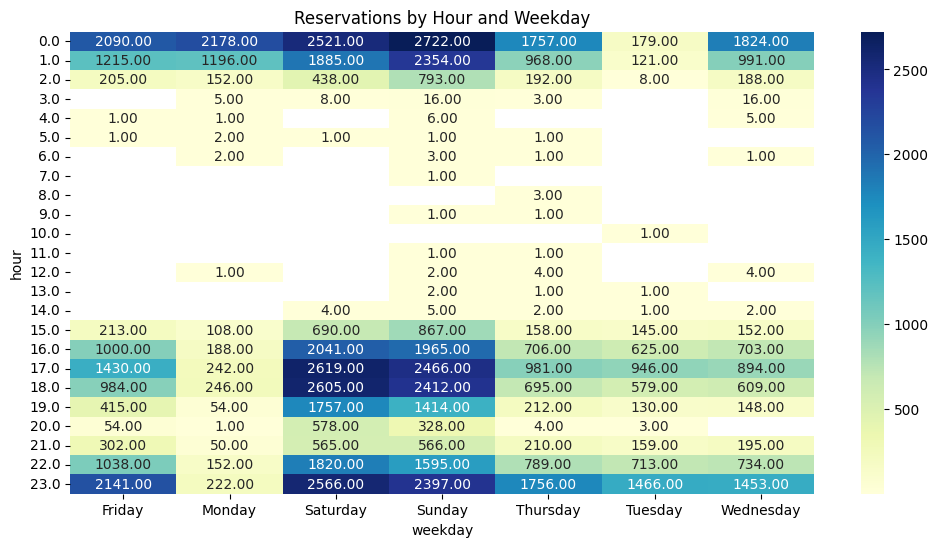

In [94]:
# Heatmap for reservations by hour and weekday
heatmap_data_hour_weekday = df_sorted.pivot_table(index='hour', columns='weekday', values='reservation_time', aggfunc='count')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_hour_weekday, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Reservations by Hour and Weekday')
plt.show()

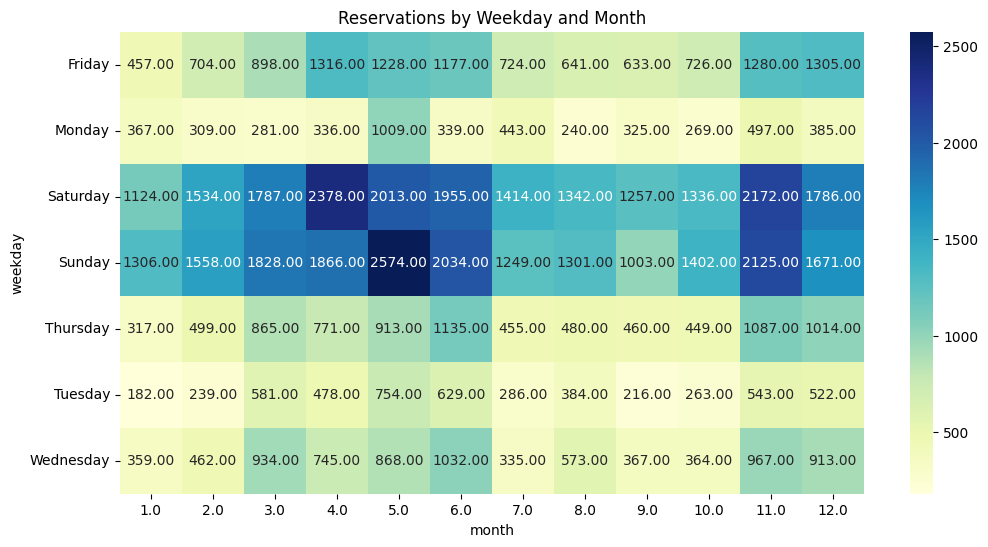

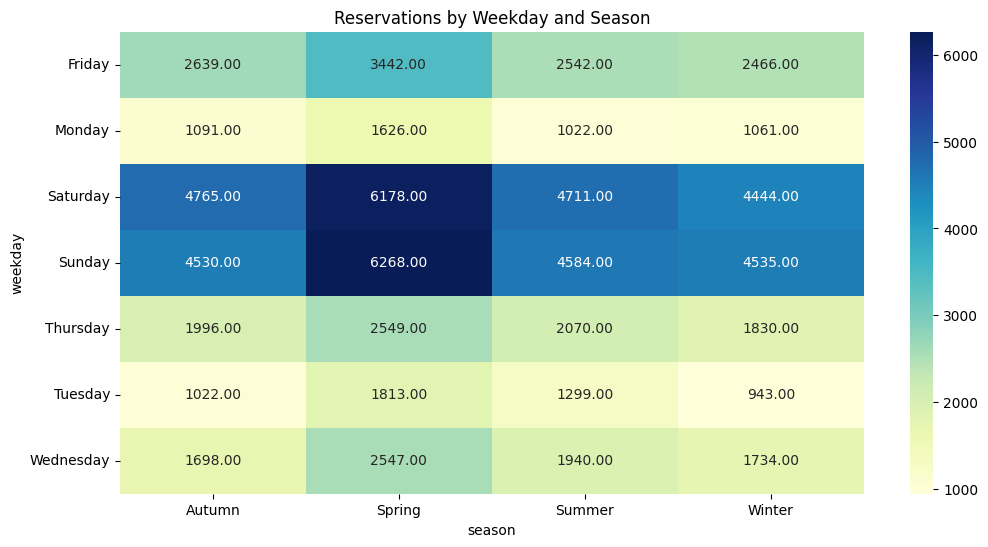

In [95]:
heatmap_data_weekday_month = df_sorted.pivot_table(index='weekday', columns='month', values='reservation_time', aggfunc='count')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_weekday_month, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Reservations by Weekday and Month')
plt.show()

# Heatmap for reservations by aweekday and season
heatmap_data_weekday_season = df_sorted.pivot_table(index='weekday', columns='season', values='reservation_time', aggfunc='count')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_weekday_season, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Reservations by Weekday and Season')
plt.show()

In [96]:
df_sorted.columns

Index(['reservation_id', 'locaion_id', 'table_pref', 'device_id', 'party_size',
       'kids_size', 'high_chair_size', 'reservation_time', 'cancellation_time',
       'estimate_seconds', 'actual_dinein_time', 'actual_dineout_time',
       'reservation_status', 'hour', 'time_bin', 'weekday', 'table_id',
       'assignment_time', 'ETA', 'table_name', 'min_capacity', 'max_capacity',
       'is_enabled', 'queue_size', 'day', 'month', 'season'],
      dtype='object')

In [97]:
df_sorted = df_sorted[['reservation_id','locaion_id','party_size','high_chair_size','reservation_time','hour','weekday','ETA','queue_size','day','month','season']]

In [98]:
df_sorted.to_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\results\\model_input.csv')

In [99]:
df_sorted = df_sorted.rename(columns={'location_i':'location_id'})

In [100]:
df_sorted.columns

Index(['reservation_id', 'locaion_id', 'party_size', 'high_chair_size',
       'reservation_time', 'hour', 'weekday', 'ETA', 'queue_size', 'day',
       'month', 'season'],
      dtype='object')

## MODEL

In [101]:
import numpy as np
import pandas as pd

# Ensure 'ETA' column exists
if 'ETA' in df_sorted.columns:
    # Set negative ETAs to 0
    df_sorted['ETA'] = df_sorted['ETA'].apply(lambda x: max(x, 0))
    
    # Identify outliers using a z-score approach
    eta_mean = df_sorted['ETA'].mean()
    eta_std = df_sorted['ETA'].std()
    df_sorted['z_score'] = (df_sorted['ETA'] - eta_mean) / eta_std
    
    # Identify outliers where z-score > 3
    outliers = df_sorted[df_sorted['z_score'] > 3]
    
    # Adjust outliers to a higher boundary
    if not outliers.empty:
        outliers['ETA'] = eta_mean + 3 * eta_std  # Adjust outliers to a higher boundary
    
    # Print outliers (if you want to see which ones were adjusted)
    print("Outliers adjusted to higher boundary:")
    print(outliers[['ETA', 'queue_size']])  # Adjust column names as per your actual DataFrame
    
    # Drop z_score column and adjust negative ETAs again
    df_sorted.drop(columns=['z_score'], inplace=True)
    df_sorted['ETA'] = df_sorted['ETA'].apply(lambda x: max(x, 0))
    
    # Print cleaned dataframe
    print("Data after handling outliers and negative ETAs:")
    print(df_sorted[['ETA', 'queue_size']])  # Adjust column names as per your actual DataFrame
    
    # Optionally, save the cleaned dataframe to a new CSV file
    cleaned_file_path = 'model_input.csv'  # Update with desired path
    df_sorted.to_csv(cleaned_file_path, index=False)
else:
    print("Column 'ETA' not found in the dataset")


C:\Users\Admin\AppData\Local\Temp\ipykernel_14120\2283375027.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['ETA'] = eta_mean + 3 * eta_std  # Adjust outliers to a higher boundary


Outliers adjusted to higher boundary:
             ETA  queue_size
56891  31.089749           4
57167  31.089749           2
74685  31.089749           2
5461   31.089749           1
64491  31.089749           1
...          ...         ...
38020  31.089749           3
17578  31.089749           1
78790  31.089749           1
22780  31.089749           1
64725  31.089749           1

[593 rows x 2 columns]
Data after handling outliers and negative ETAs:
             ETA  queue_size
46228  14.783333           1
48515  14.366667           2
79372   2.466667           3
73802   1.383333           4
5089    0.883333           1
...          ...         ...
25698   4.033333           3
5194    1.616667           4
64725  52.016667           1
70648  17.133333           1
52323   9.883333           2

[77345 rows x 2 columns]


In [102]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor  # Import XGBoost
from sklearn.preprocessing import OneHotEncoder
import time

data = pd.read_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\results\\model_input.csv')

data['reservation_time'] = pd.to_datetime(data['reservation_time'])

data['month'] = data['reservation_time'].dt.month
data['season'] = (data['month'] % 12 + 3) // 3  

season_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
season_encoded = season_encoder.fit_transform(data[['season']])
season_encoded_df = pd.DataFrame(season_encoded.toarray(), columns=season_encoder.get_feature_names_out(['season']), index=data.index)

month_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
month_encoded = month_encoder.fit_transform(data[['month']])
month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=data.index)

high_chair_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
high_chair_encoded = high_chair_encoder.fit_transform(data[['high_chair_size']])
high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=data.index)

data_encoded = pd.concat([data, season_encoded_df, month_encoded_df, high_chair_encoded_df], axis=1)

features = ['party_size', 'queue_size'] + list(season_encoded_df.columns) + list(month_encoded_df.columns) + list(high_chair_encoded_df.columns)
target = 'ETA'


def handle_negative_zero(df):
    df['ETA'] = df['ETA'].apply(lambda x: max(x, 0))
    return df

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'XGBoost Regression': XGBRegressor(random_state=42)  
}

results = {}

for model_name, model in models.items():
    start_time = time.time() 

    df_processed = data_encoded.copy()

    df_processed = handle_negative_zero(df_processed)

    X = df_processed[features]
    y = df_processed[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)

    end_time = time.time()
    computation_time = end_time - start_time


    results[model_name] = {
        'MAE': mae,
        'Computation Time': computation_time
    }

best_model = None
best_mae = float('inf')
best_computation_time = float('inf')

for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"MAE = {metrics['MAE']:.2f}, Computation Time = {metrics['Computation Time']:.4f} seconds")
    if metrics['MAE'] < best_mae or (metrics['MAE'] == best_mae and metrics['Computation Time'] < best_computation_time):
        best_model = model
        best_mae = metrics['MAE']
        best_computation_time = metrics['Computation Time']

print(f"\nBest Model: {best_model}")
print(f"Best MAE: {best_mae:.2f}")
print(f"Computation Time: {best_computation_time:.4f} seconds")



Model: Linear Regression
MAE = 0.94, Computation Time = 0.4432 seconds
Model: Ridge Regression
MAE = 0.94, Computation Time = 0.2130 seconds
Model: Lasso Regression
MAE = 0.98, Computation Time = 0.3360 seconds
Model: Decision Tree Regression
MAE = 0.75, Computation Time = 0.1407 seconds
Model: XGBoost Regression
MAE = 0.74, Computation Time = 0.4967 seconds

Best Model: XGBoost Regression
Best MAE: 0.74
Computation Time: 0.4967 seconds


In [103]:

user_party_size = 4
user_queue_size = 59
user_reservation_time = '2024-07-08 00:30:05' 

user_reservation_time = pd.to_datetime(user_reservation_time)

user_month = user_reservation_time.month
user_season = (user_month % 12 + 3) // 3

user_high_chair = 2 

user_input_df = pd.DataFrame({
    'party_size': [user_party_size],
    'queue_size': [user_queue_size],
    'reservation_time': [user_reservation_time],
    'month': [user_month],
    'season': [user_season],
    'high_chair_size': [user_high_chair] 
})


user_season_encoded = season_encoder.transform(user_input_df[['season']])
user_season_encoded_df = pd.DataFrame(user_season_encoded.toarray(), columns=season_encoder.get_feature_names_out(['season']))

user_month_encoded = month_encoder.transform(user_input_df[['month']])
user_month_encoded_df = pd.DataFrame(user_month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']))

user_high_chair_encoded = high_chair_encoder.transform(user_input_df[['high_chair_size']])
user_high_chair_encoded_df = pd.DataFrame(user_high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']))

user_input_encoded = pd.concat([user_input_df, user_season_encoded_df, user_month_encoded_df, user_high_chair_encoded_df], axis=1)

X_user = user_input_encoded[features] 

best_model_instance = models[best_model]
y_pred_user = best_model_instance.predict(X_user)

predicted_eta = y_pred_user[0]
print(f"\nUser Input:")
print(f"Party Size: {user_party_size}")
print(f"Queue Size: {user_queue_size}")
print(f"Month: {user_month}")
print(f"Season: {user_season}")
print(f"High Chair Requested: {user_high_chair}")
print(f"Predicted ETA: {predicted_eta:.3f} minutes")



User Input:
Party Size: 4
Queue Size: 59
Month: 7
Season: 3
High Chair Requested: 2
Predicted ETA: 44.556 minutes


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Final Model

In [104]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
import time

# Load the data
data = pd.read_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\results\\model_input.csv')

# Convert reservation_time to datetime
data['reservation_time'] = pd.to_datetime(data['reservation_time'])

# Extract month, season, and hour from reservation_time
data['month'] = data['reservation_time'].dt.month
data['season'] = (data['month'] % 12 + 3) // 3
data['hour'] = data['reservation_time'].dt.hour

# One-hot encode categorical features
season_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
season_encoded = season_encoder.fit_transform(data[['season']])
season_encoded_df = pd.DataFrame(season_encoded.toarray(), columns=season_encoder.get_feature_names_out(['season']), index=data.index)

month_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
month_encoded = month_encoder.fit_transform(data[['month']])
month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=data.index)

high_chair_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
high_chair_encoded = high_chair_encoder.fit_transform(data[['high_chair_size']])
high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=data.index)

# Combine all encoded features with the original data
data_encoded = pd.concat([data, season_encoded_df, month_encoded_df, high_chair_encoded_df], axis=1)

# Define features including the hour feature
features = ['party_size', 'queue_size', 'hour'] + list(season_encoded_df.columns) + list(month_encoded_df.columns) + list(high_chair_encoded_df.columns)
target = 'ETA'

# Function to handle negative and zero ETA values
def handle_negative_zero(df):
    df['ETA'] = df['ETA'].apply(lambda x: max(x, 0))
    return df

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'XGBoost Regression': XGBRegressor(random_state=42)
}

# Store results
results = {}
model_objects = {}

# Iterate over each model
for model_name, model in models.items():
    start_time = time.time()  # Start time for computation time

    # Create a copy of the data
    df_processed = data_encoded.copy()

    # Handle negative and zero ETA values
    df_processed = handle_negative_zero(df_processed)

    # Define features (X) and target (y)
    X = df_processed[features]
    y = df_processed[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    end_time = time.time()  # End time for computation time
    computation_time = end_time - start_time

    # Store results and model object
    results[model_name] = {
        'MAE': mae,
        'Computation Time': computation_time
    }
    model_objects[model_name] = model

# Determine the best model based on MAE and computation time
best_model_name = None
best_mae = float('inf')
best_computation_time = float('inf')

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MAE = {metrics['MAE']:.2f}, Computation Time = {metrics['Computation Time']:.4f} seconds")
    if metrics['MAE'] < best_mae or (metrics['MAE'] == best_mae and metrics['Computation Time'] < best_computation_time):
        best_model_name = model_name
        best_mae = metrics['MAE']
        best_computation_time = metrics['Computation Time']

best_model = model_objects[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best MAE: {best_mae:.2f}")
print(f"Computation Time: {best_computation_time:.4f} seconds")

# Function to prepare input data for prediction
def prepare_input_data(input_data, season_encoder, month_encoder, high_chair_encoder):
    input_df = pd.DataFrame([input_data])
    input_df['reservation_time'] = pd.to_datetime(input_df['reservation_time'])
    input_df['month'] = input_df['reservation_time'].dt.month
    input_df['season'] = (input_df['month'] % 12 + 3) // 3
    input_df['hour'] = input_df['reservation_time'].dt.hour

    season_encoded = season_encoder.transform(input_df[['season']])
    season_encoded_df = pd.DataFrame(season_encoded.toarray(), columns=season_encoder.get_feature_names_out(['season']), index=input_df.index)

    month_encoded = month_encoder.transform(input_df[['month']])
    month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=input_df.index)

    high_chair_encoded = high_chair_encoder.transform(input_df[['high_chair_size']])
    high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=input_df.index)

    input_encoded = pd.concat([input_df, season_encoded_df, month_encoded_df, high_chair_encoded_df], axis=1)
    return input_encoded[features]



Model: Linear Regression
MAE = 0.94, Computation Time = 0.2375 seconds
Model: Ridge Regression
MAE = 0.94, Computation Time = 0.1718 seconds
Model: Lasso Regression
MAE = 0.98, Computation Time = 0.3495 seconds
Model: Decision Tree Regression
MAE = 0.92, Computation Time = 0.2569 seconds
Model: XGBoost Regression
MAE = 0.84, Computation Time = 0.4864 seconds

Best Model: XGBoost Regression
Best MAE: 0.84
Computation Time: 0.4864 seconds


In [105]:
# Example input for prediction
input_data = {
    'reservation_time': '2024-07-12 00:30:00',
    'party_size': 1,
    'high_chair_size': 0,
    'queue_size': 1
}

# Prepare the input data
input_encoded = prepare_input_data(input_data, season_encoder, month_encoder, high_chair_encoder)

# Predict using the best model
prediction = best_model.predict(input_encoded)
print(f"Predicted ETA: {prediction[0]:.2f} minutes")

Predicted ETA: 0.33 minutes


# FINAL 2

In [106]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
import time

# Load the data
data = pd.read_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\results\\model_input.csv')

# Convert reservation_time to datetime
data['reservation_time'] = pd.to_datetime(data['reservation_time'])

# Extract month, hour, and weekday from reservation_time
data['month'] = data['reservation_time'].dt.month
data['hour'] = data['reservation_time'].dt.hour
data['weekday'] = data['reservation_time'].dt.weekday

# One-hot encode categorical features
month_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
month_encoded = month_encoder.fit_transform(data[['month']])
month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=data.index)

high_chair_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
high_chair_encoded = high_chair_encoder.fit_transform(data[['high_chair_size']])
high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=data.index)

weekday_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
weekday_encoded = weekday_encoder.fit_transform(data[['weekday']])
weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=data.index)

# Combine all encoded features with the original data
data_encoded = pd.concat([data, month_encoded_df, high_chair_encoded_df, weekday_encoded_df], axis=1)

# Define features including the hour and weekday features
features = ['party_size', 'queue_size', 'hour'] + list(month_encoded_df.columns) + list(high_chair_encoded_df.columns) + list(weekday_encoded_df.columns)
target = 'ETA'

# Function to handle negative and zero ETA values
def handle_negative_zero(df):
    df['ETA'] = df['ETA'].apply(lambda x: max(x, 0))
    return df

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'XGBoost Regression': XGBRegressor(random_state=42)
}

# Store results
results = {}
model_objects = {}

# Iterate over each model
for model_name, model in models.items():
    start_time = time.time()  # Start time for computation time

    # Create a copy of the data
    df_processed = data_encoded.copy()

    # Handle negative and zero ETA values
    df_processed = handle_negative_zero(df_processed)

    # Define features (X) and target (y)
    X = df_processed[features]
    y = df_processed[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    end_time = time.time()  # End time for computation time
    computation_time = end_time - start_time

    # Store results and model object
    results[model_name] = {
        'MAE': mae,
        'Computation Time': computation_time
    }
    model_objects[model_name] = model

# Determine the best model based on MAE and computation time
best_model_name = None
best_mae = float('inf')
best_computation_time = float('inf')

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MAE = {metrics['MAE']:.2f}, Computation Time = {metrics['Computation Time']:.4f} seconds")
    if metrics['MAE'] < best_mae or (metrics['MAE'] == best_mae and metrics['Computation Time'] < best_computation_time):
        best_model_name = model_name
        best_mae = metrics['MAE']
        best_computation_time = metrics['Computation Time']

best_model = model_objects[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best MAE: {best_mae:.2f}")
print(f"Computation Time: {best_computation_time:.4f} seconds")

# Function to prepare input data for prediction
def prepare_input_data(input_data, month_encoder, high_chair_encoder, weekday_encoder):
    input_df = pd.DataFrame([input_data])
    input_df['reservation_time'] = pd.to_datetime(input_df['reservation_time'])
    input_df['month'] = input_df['reservation_time'].dt.month
    input_df['hour'] = input_df['reservation_time'].dt.hour
    input_df['weekday'] = input_df['reservation_time'].dt.weekday

    month_encoded = month_encoder.transform(input_df[['month']])
    month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=input_df.index)

    high_chair_encoded = high_chair_encoder.transform(input_df[['high_chair_size']])
    high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=input_df.index)

    weekday_encoded = weekday_encoder.transform(input_df[['weekday']])
    weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=input_df.index)

    input_encoded = pd.concat([input_df, month_encoded_df, high_chair_encoded_df, weekday_encoded_df], axis=1)
    return input_encoded[features]


Model: Linear Regression
MAE = 0.95, Computation Time = 0.3714 seconds
Model: Ridge Regression
MAE = 0.95, Computation Time = 0.1614 seconds
Model: Lasso Regression
MAE = 0.98, Computation Time = 0.5065 seconds
Model: Decision Tree Regression
MAE = 0.80, Computation Time = 0.2062 seconds
Model: XGBoost Regression
MAE = 0.81, Computation Time = 0.5901 seconds

Best Model: Decision Tree Regression
Best MAE: 0.80
Computation Time: 0.2062 seconds


In [107]:
# Example input for prediction
input_data = {
    'reservation_time': '2024-07-16 00:30:00',
    'party_size': 8,
    'high_chair_size': 0,
    'queue_size': 8
}

# Prepare the input data
input_encoded = prepare_input_data(input_data, month_encoder, high_chair_encoder, weekday_encoder)

# Predict using the best model
prediction = best_model.predict(input_encoded)
print(f"Predicted ETA: {prediction[0]:.2f} minutes")


Predicted ETA: 32.50 minutes


## analysis

In [108]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor  # Import XGBoost
from sklearn.preprocessing import OneHotEncoder
import time

# Load the data
data = pd.read_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\results\\model_input.csv')

# Convert reservation_time to datetime
data['reservation_time'] = pd.to_datetime(data['reservation_time'])

# Extract month, hour, and weekday from reservation_time
data['month'] = data['reservation_time'].dt.month
data['hour'] = data['reservation_time'].dt.hour
data['weekday'] = data['reservation_time'].dt.weekday

# One-hot encode the categorical features
month_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
month_encoded = month_encoder.fit_transform(data[['month']])
month_encoded_df = pd.DataFrame(month_encoded.toarray(), columns=month_encoder.get_feature_names_out(['month']), index=data.index)

hour_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
hour_encoded = hour_encoder.fit_transform(data[['hour']])
hour_encoded_df = pd.DataFrame(hour_encoded.toarray(), columns=hour_encoder.get_feature_names_out(['hour']), index=data.index)

weekday_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
weekday_encoded = weekday_encoder.fit_transform(data[['weekday']])
weekday_encoded_df = pd.DataFrame(weekday_encoded.toarray(), columns=weekday_encoder.get_feature_names_out(['weekday']), index=data.index)

high_chair_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
high_chair_encoded = high_chair_encoder.fit_transform(data[['high_chair_size']])
high_chair_encoded_df = pd.DataFrame(high_chair_encoded.toarray(), columns=high_chair_encoder.get_feature_names_out(['high_chair_size']), index=data.index)

# Combine all encoded features with the original data
data_encoded = pd.concat([data, month_encoded_df, hour_encoded_df, weekday_encoded_df, high_chair_encoded_df], axis=1)

# Define features including the hour and weekday features
features = ['party_size', 'queue_size'] + list(month_encoded_df.columns) + list(hour_encoded_df.columns) + list(weekday_encoded_df.columns) + list(high_chair_encoded_df.columns)
target = 'ETA'

# Function to handle negative or zero ETA values
def handle_negative_zero(df):
    df['ETA'] = df['ETA'].apply(lambda x: max(x, 0))
    return df

# Remove rows with missing ETA values
data_encoded = data_encoded.dropna(subset=['ETA'])

# Dictionary of models to be tested
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'XGBoost Regression': XGBRegressor(random_state=42)  
}

# Training and evaluating models
results = {}
for model_name, model in models.items():
    start_time = time.time()
    df_processed = data_encoded.copy()
    df_processed = handle_negative_zero(df_processed)
    X = df_processed[features]
    y = df_processed[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    end_time = time.time()
    computation_time = end_time - start_time
    results[model_name] = {'MAE': mae, 'Computation Time': computation_time}

# Select the best model based on MAE
best_model = None
best_mae = float('inf')
best_computation_time = float('inf')
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"MAE = {metrics['MAE']:.2f}, Computation Time = {metrics['Computation Time']:.4f} seconds")
    if metrics['MAE'] < best_mae or (metrics['MAE'] == best_mae and metrics['Computation Time'] < best_computation_time):
        best_model = model
        best_mae = metrics['MAE']
        best_computation_time = metrics['Computation Time']
print(f"\nBest Model: {best_model}")
print(f"Best MAE: {best_mae:.2f}")
print(f"Computation Time: {best_computation_time:.4f} seconds")

# Predicting ETA for each row and calculating the error
best_model_instance = models[best_model]

# Ensure the feature DataFrame includes the non-one-hot encoded columns
data_encoded_features = pd.concat([data[['party_size', 'queue_size']], month_encoded_df, hour_encoded_df, weekday_encoded_df, high_chair_encoded_df], axis=1)

# Predict ETA
data['predicted_eta'] = best_model_instance.predict(data_encoded_features)
data['error'] = data['ETA'] - data['predicted_eta']

# Save the results to a new CSV file
output_path = 'C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\predicted_eta.csv'
data.to_csv(output_path, index=False)

print(f"Predictions and errors saved to {output_path}")


Model: Linear Regression
MAE = 0.97, Computation Time = 0.9924 seconds
Model: Ridge Regression
MAE = 0.97, Computation Time = 0.1775 seconds
Model: Lasso Regression
MAE = 0.98, Computation Time = 0.4827 seconds
Model: Decision Tree Regression
MAE = 0.95, Computation Time = 0.2012 seconds
Model: XGBoost Regression
MAE = 0.86, Computation Time = 0.5124 seconds

Best Model: XGBoost Regression
Best MAE: 0.86
Computation Time: 0.5124 seconds
Predictions and errors saved to C:\Users\Admin\Downloads\ETA_checkin\ETA_checkin\predicted_eta.csv


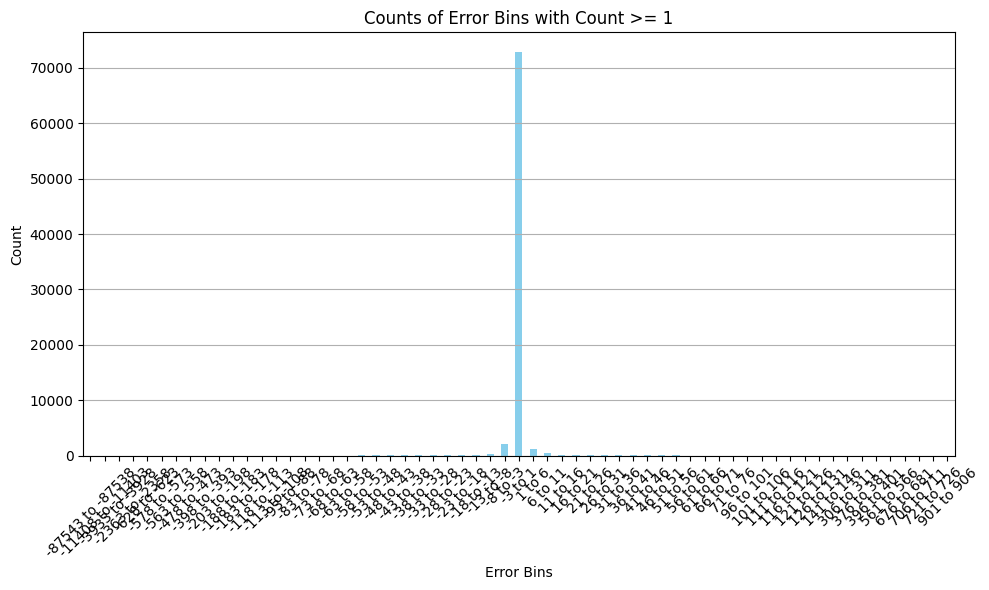

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your actual data
data_path = 'C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\predicted_eta.csv'  # Replace this with the actual path to your CSV file
data = pd.read_csv(data_path)

min_error = data['error'].min()
max_error = data['error'].max()

# Create bins with 5-unit intervals
bin_edges = np.arange(min_error, max_error + 5, 5)

custom_bin_labels = [f"{int(bin_edges[i])} to {int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]

data['error_bin'] = pd.cut(data['error'], bins=bin_edges, labels=custom_bin_labels, include_lowest=True, right=False)

bin_counts = data['error_bin'].value_counts().sort_index()

filtered_bins = bin_counts[bin_counts >= 1]

plt.figure(figsize=(10, 6))
filtered_bins.plot(kind='bar', color='skyblue')
plt.xlabel('Error Bins')
plt.ylabel('Count')
plt.title('Counts of Error Bins with Count >= 1')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()




In [110]:
highest_count_bin = filtered_bins.idxmax()
filtered_data = data[data['error_bin'] == highest_count_bin]
sorted_data = filtered_data.sort_values(by='error_bin')
weekday_counts = sorted_data['weekday'].value_counts().sort_index()

In [111]:
data_bin = ['-3 to 1']
filtered_df = data[~data['error_bin'].isin(data_bin)]
bin_counts = filtered_df['error_bin'].value_counts().sort_index()

filtered_bins = bin_counts[bin_counts >= 1]


In [112]:
filtered_bins

error_bin
-87543 to -87538       1
-11408 to -11403       1
-3933 to -3928         1
-2363 to -2358         1
-628 to -623           1
-578 to -573           3
-563 to -558           1
-478 to -473           1
-398 to -393           2
-203 to -198           1
-188 to -183           2
-183 to -178           1
-118 to -113           1
-113 to -108           1
-93 to -88             2
-83 to -78             4
-73 to -68             3
-68 to -63             3
-63 to -58             3
-58 to -53             6
-53 to -48             6
-48 to -43             8
-43 to -38             7
-38 to -33            15
-33 to -28            22
-28 to -23            22
-23 to -18            38
-18 to -13            91
-13 to -8            344
-8 to -3            2082
1 to 6              1138
6 to 11              381
11 to 16             122
16 to 21              69
21 to 26              43
26 to 31              41
31 to 36              22
36 to 41              19
41 to 46              19
46 to 51       

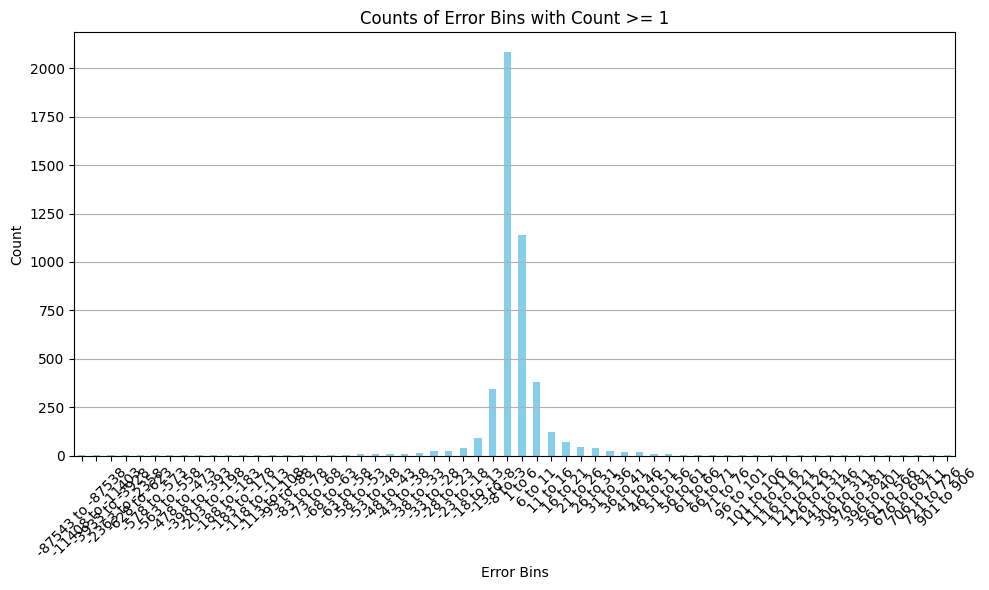

In [113]:
plt.figure(figsize=(10, 6))
filtered_bins.plot(kind='bar', color='skyblue')
plt.xlabel('Error Bins')
plt.ylabel('Count')
plt.title('Counts of Error Bins with Count >= 1')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [114]:
highest_count_bin = filtered_bins.idxmax()

filtered_data = data[data['error_bin'] == highest_count_bin]

sorted_data = filtered_data.sort_values(by='error_bin')

weekday_counts = sorted_data['weekday'].value_counts().sort_index()

In [115]:
highest_count_bin

'-8 to -3'

In [116]:
data.to_csv('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\predicted_eta_binned.csv')